In [3]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/flights_dataset.csv')
df = df.drop(df.columns[0], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
# Price is in Indian rupees, let us convert it to usd

df['price'] = df['price'].div(83).round(2)

__Data Visualization__

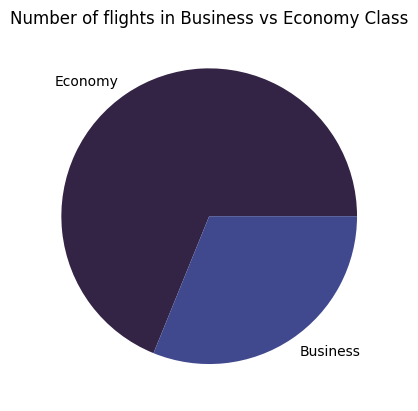

In [8]:
class_counts = df['class'].value_counts()
colors = ['#332345', '#40498e']
class_counts.plot(kind='pie', colors=colors)
plt.title("Number of flights in Business vs Economy Class")
plt.ylabel('')
plt.show()

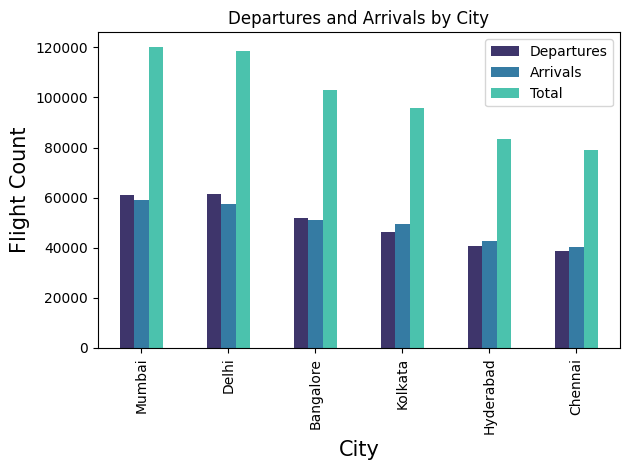

In [9]:
departure_counts = df['source_city'].value_counts()
arrival_counts = df['destination_city'].value_counts()

city_counts = pd.concat([departure_counts, arrival_counts], axis=1, keys=['Departures', 'Arrivals'])

city_counts['Total'] = city_counts['Departures'] + city_counts['Arrivals']
city_counts.sort_values(by='Total', ascending=False, inplace=True)

fig, ax = plt.subplots()
city_counts.plot(kind='bar', color=['#3e356b', '#357ba3', '#4bc2ad'], ax=ax)

plt.xlabel('City', fontsize=15)
plt.ylabel('Flight Count', fontsize=15)
plt.title('Departures and Arrivals by City')

plt.legend()
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Airline prices based on companies for business class')

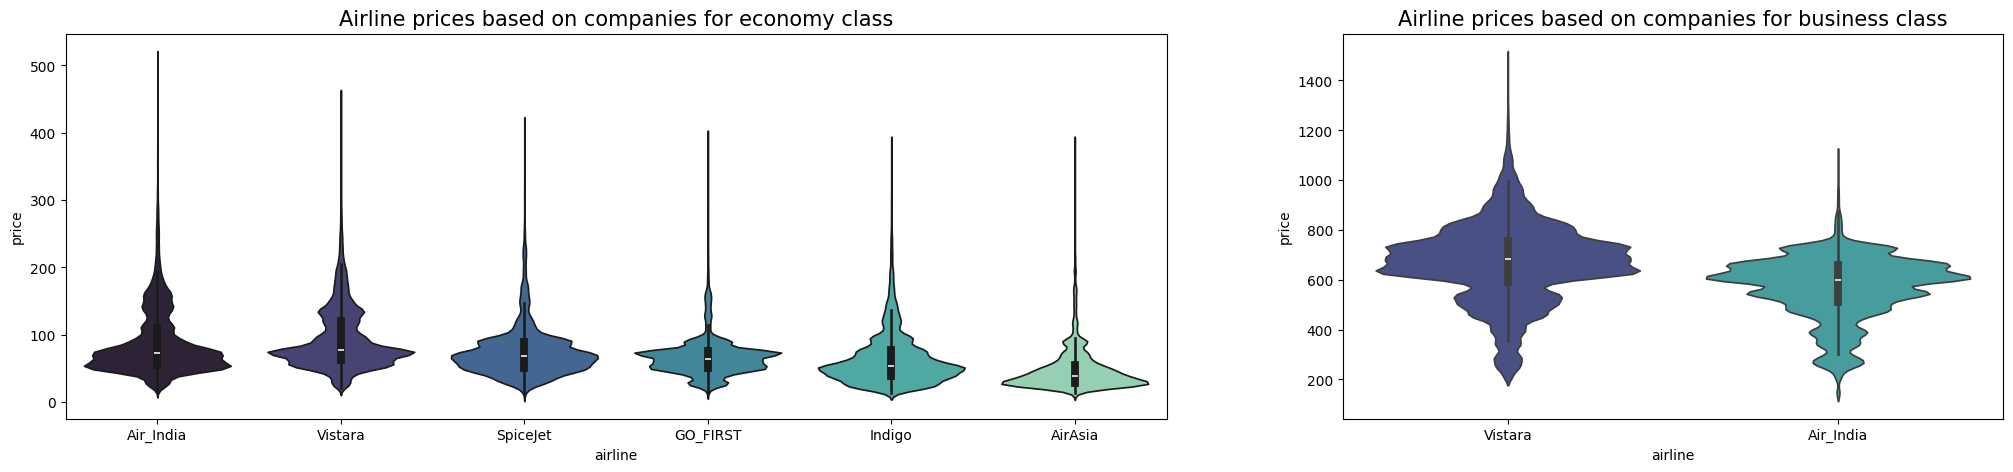

In [10]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

sns.violinplot(y = "price", x = "airline", 
               data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), 
               palette='mako', hue='airline', legend=False, ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy class",fontsize=15)

sns.violinplot(y = "price", x = "airline",
               data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), 
               palette='mako', hue='airline', legend=False, ax=axs[1])
axs[1].set_title("Airline prices based on companies for business class", fontsize=15)

Text(0.5, 1.0, 'Airline prices based on the number of stops Business class')

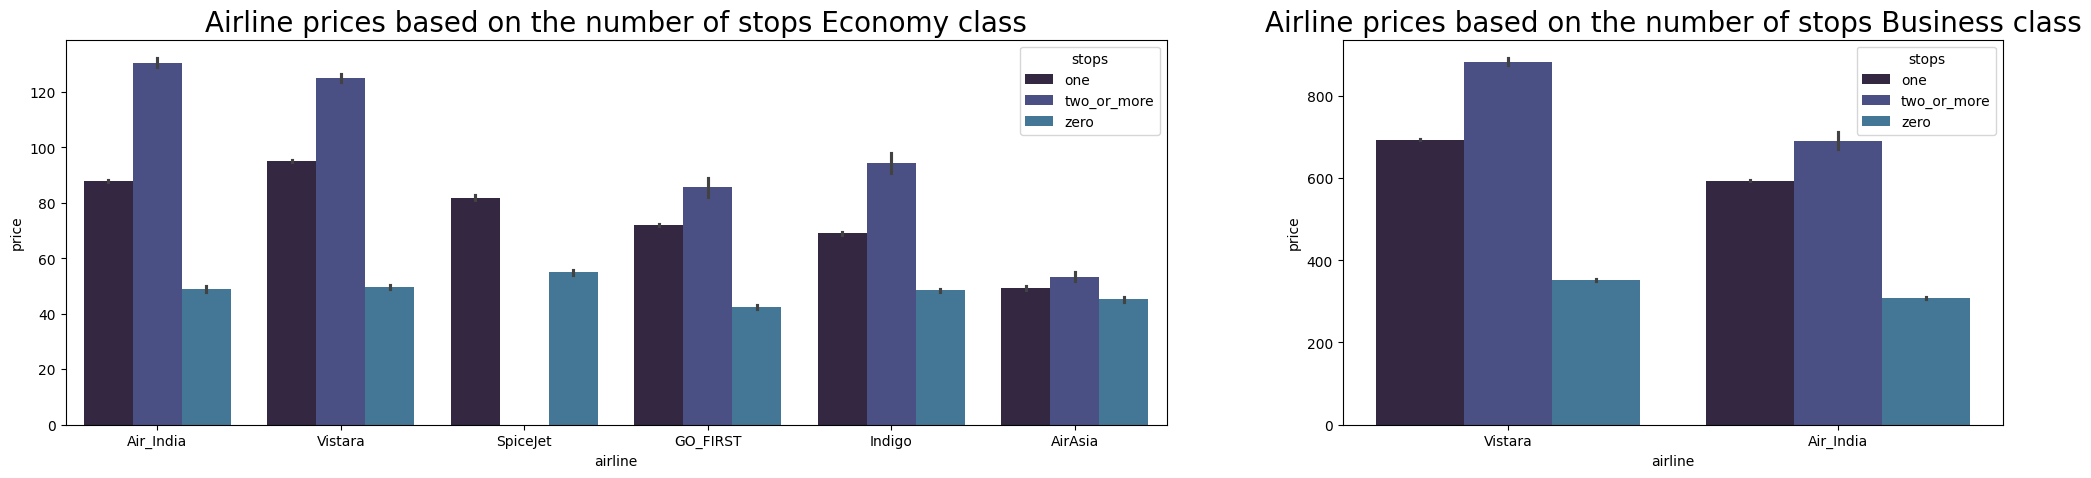

In [11]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

sns.barplot(y = "price", x = "airline", hue="stops", 
            data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False),
            palette=['#332345', '#40498e', '#357ba3'], ax=axs[0])


sns.barplot(y = "price", x = "airline", hue="stops",
            data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), 
            palette=['#332345', '#40498e', '#357ba3'], ax=axs[1])

axs[0].set_title("Airline prices based on the number of stops Economy class",fontsize=20)
axs[1].set_title("Airline prices based on the number of stops Business class",fontsize=20)

In [12]:
mako_palette = sns.color_palette("mako", 5)

# Display the color codes in hexadecimal format to have beautiful plots
print("Hexadecimal color codes from the 'mako' palette:")
for color in mako_palette:
    hex_color = sns.palettes.color_palette([color]).as_hex()[0]
    print(hex_color)

Hexadecimal color codes from the 'mako' palette:
#332345
#40498e
#357ba3
#38aaac
#79d6ae


Text(0, 0.5, 'Average Price')

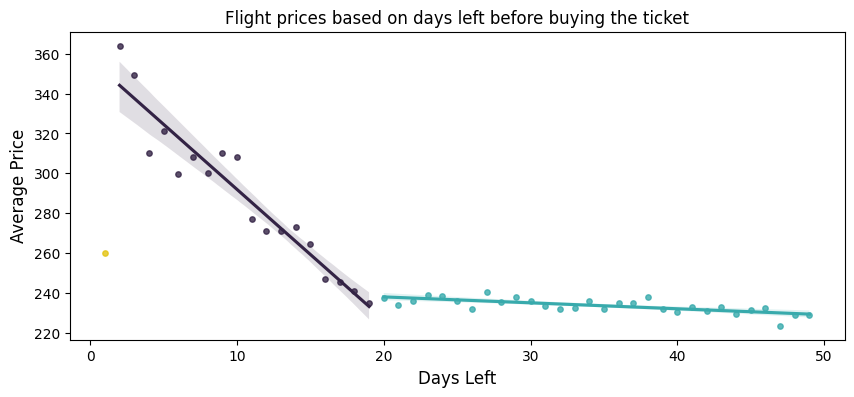

In [13]:
price_by_day = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.title('Flight prices based on days left before buying the ticket', fontsize=12)

ax = sns.regplot(x='days_left', y='price', data=price_by_day[price_by_day['days_left'] == 1],
                 scatter_kws={'color': "#e3c310", 's': 15}, line_kws={"color": "#79d6ae"}, scatter=True, fit_reg=False)

sns.regplot(x='days_left', y='price', data=price_by_day[(price_by_day['days_left'] > 1) & (price_by_day['days_left'] < 20)],
            scatter_kws={'color': "#332345", 's': 15}, line_kws={"color": "#332345"}, ax=ax)

sns.regplot(x='days_left', y='price', data=price_by_day[price_by_day['days_left'] >= 20],
            scatter_kws={'color': "#38aaac", 's': 15}, line_kws={"color": "#38aaac"}, ax=ax)

# Set x and y labels
plt.xlabel('Days Left', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

#plt.scatter(x=df['days_left'].unique(), y=grouped_averaged_price_by_days['price'])